# Analysis for training A2C on CartPole-v0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

## Analyse training results

In [4]:
training_results_df = pd.read_csv("training_results_v0_20210407-003658.csv")
training_results_df.head(3)

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
0,0,20210407-003658,127.935775,6,50000,0.001,"(32, 32)",14.9,119.6,72.662,25.978005,-0.107228,2.421044,-3.228996,2.310600
1,1,20210407-003658,125.215379,6,50000,0.001,"(64, 64)",16.5,148.4,90.462,30.421196,-0.107516,2.086534,-3.176658,1.975838
2,2,20210407-003658,128.042971,6,50000,0.001,"(128, 128)",15.4,142.1,98.764,27.709347,-0.107310,1.892873,-3.167362,1.782418


In [5]:
training_results_df["reward_variance"].describe()

count    54.000000
mean     33.264907
std       4.634868
min      23.730288
25%      30.337798
50%      33.128667
75%      36.004535
max      45.285102
Name: reward_variance, dtype: float64

In [6]:
# Understand the min-max or ranges of each column
training_results_df.describe()

,index,wall_time,num_env,num_episodes,learning_rate,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,249.775966,14.000000,75000.000000,0.002000,22.648148,180.142593,116.713481,33.264907,-0.064967,1.386653,-3.083281,1.318598
std,15.732133,99.576889,7.553582,25234.746934,0.000824,5.675227,18.011051,16.161215,4.634868,0.039937,0.371981,0.052588,0.340634
min,0.000000,125.215379,6.000000,50000.000000,0.001000,14.100000,119.600000,72.662000,23.730288,-0.131164,0.801398,-3.228996,0.775860
25%,13.250000,160.827822,6.000000,50000.000000,0.001000,18.225000,169.250000,104.171250,30.337798,-0.107290,1.109214,-3.110827,1.043062
50%,26.500000,230.602507,12.000000,75000.000000,0.002000,21.100000,184.100000,120.631000,33.128667,-0.063878,1.314386,-3.084402,1.246732
75%,39.750000,316.557476,24.000000,100000.000000,0.003000,27.200000,195.025000,129.024000,36.004535,-0.023945,1.648924,-3.047157,1.531867
max,53.000000,428.945427,24.000000,100000.000000,0.003000,35.300000,200.000000,141.977000,45.285102,0.005607,2.421044,-2.969989,2.310600


## Plot metrics to compare models

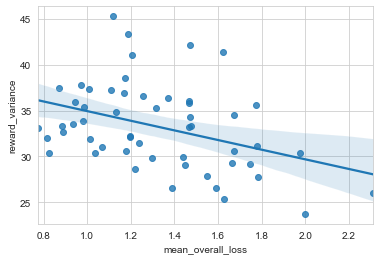

In [7]:
# First, is there a correlation between reward_variance and mean_overall_loss?
sns.regplot(data=training_results_df, x="mean_overall_loss", y="reward_variance");
# So: Reward variance goes down as mean_overall_loss increases!

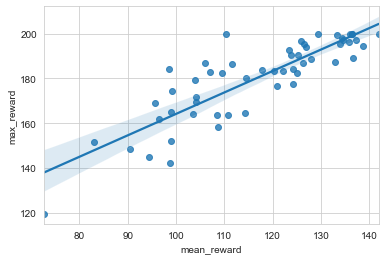

In [8]:
# Is there a correlation between max_reward and mean_reward?
sns.regplot(data=training_results_df, x="mean_reward", y="max_reward");
# So: There is a positive correlation

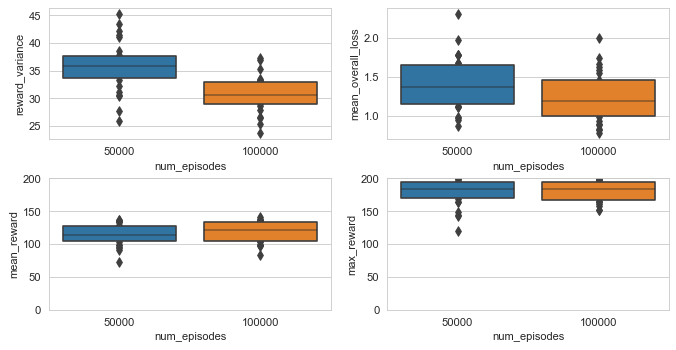

In [9]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=training_results_df, x="num_episodes", y="reward_variance");

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=training_results_df, x="num_episodes", y="mean_overall_loss");

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=training_results_df, x="num_episodes", y="mean_reward");
plt.ylim([0, 200]);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=training_results_df, x="num_episodes", y="max_reward");
plt.ylim([0, 200]);
# plt.title("Comparison of A2C models trained on CartPole-v0");
# Reward variance and mean overall loss is much lower learning on a higher number of episodes.
# Mean rewards don't change much, but max rewards are a little higher with a higher number of episodes.
# So: Based on the lower reward_variance and mean overall loss, we favour a model trained on 100000 episodes.

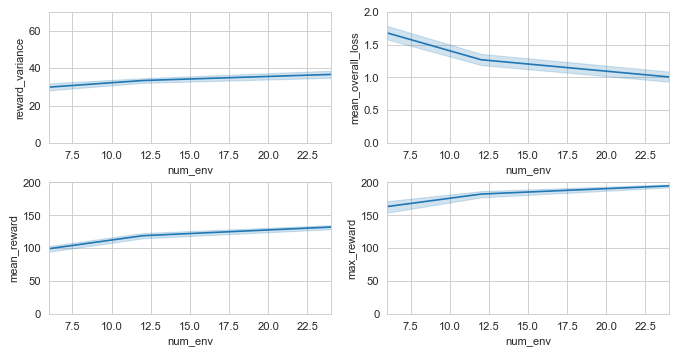

In [10]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.lineplot(data=training_results_df, x="num_env", y="reward_variance");
plt.ylim([0, 70]);
plt.xlim([6, 24]);

ax2 = fig.add_subplot(2, 2, 2)
sns.lineplot(data=training_results_df, x="num_env", y="mean_overall_loss");
plt.ylim([0, 2.0]);
plt.xlim([6, 24]);

ax3 = fig.add_subplot(2, 2, 3)
sns.lineplot(data=training_results_df, x="num_env", y="mean_reward");
plt.ylim([0, 200]);
plt.xlim([6, 24]);

ax4 = fig.add_subplot(2, 2, 4)
sns.lineplot(data=training_results_df, x="num_env", y="max_reward");
plt.ylim([0, 200]);
plt.xlim([6, 24]);

# Notes: High num_envs = lowest overall loss, highest mean and max reward, but highest variance.
# Reward variance increases a little going from 6 to 24 environments, but mean overall loss drops.
# Mean reward rises by about 30%, and max rewards increase slightly.
# So: Based on mean overall loss, we will favour a model trained 
# on more environments, but we will be cautious about reward variance.

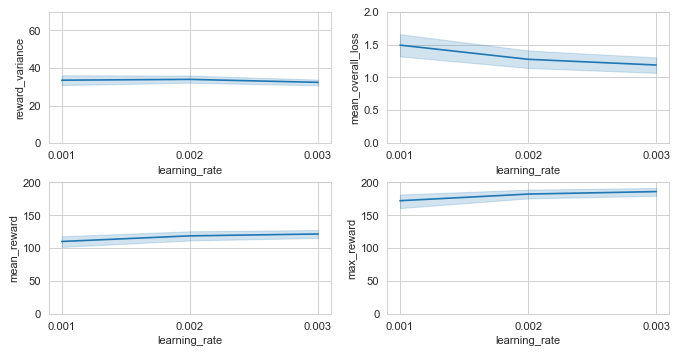

In [11]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.lineplot(data=training_results_df, x="learning_rate", y="reward_variance");
plt.ylim([0, 70]);
plt.xticks([0.001, 0.002, 0.003]);

ax2 = fig.add_subplot(2, 2, 2)
sns.lineplot(data=training_results_df, x="learning_rate", y="mean_overall_loss");
plt.ylim([0, 2.0]);
plt.xticks([0.001, 0.002, 0.003]);

ax3 = fig.add_subplot(2, 2, 3)
sns.lineplot(data=training_results_df, x="learning_rate", y="mean_reward");
plt.ylim([0, 200]);
plt.xticks([0.001, 0.002, 0.003]);

ax4 = fig.add_subplot(2, 2, 4)
sns.lineplot(data=training_results_df, x="learning_rate", y="max_reward");
plt.ylim([0, 200]);
plt.xticks([0.001, 0.002, 0.003]);

# A rise in reward variance and notable drop in mean overall loss with a higher learning rate.
# Slight increase in mean reward and a slightly bigger rise in max reward with higher learning rate.
# So: Based on the mean overall loss and max reward, we will favour a model with higher learning rate,
# but again be cautious of the increase in reward variance.

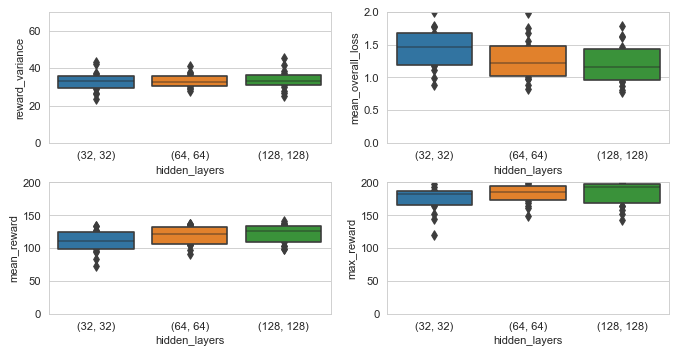

In [12]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="reward_variance");
plt.ylim([0, 70]);

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="mean_overall_loss");
plt.ylim([0, 2.0]);

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="mean_reward");
plt.ylim([0, 200]);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=training_results_df, x="hidden_layers", y="max_reward");
plt.ylim([0, 200]);

# Highest reward variance with 64 neurons
# Lowest mean loss with 128 neurons
# Mean reward higher but tied between 64 and 128 neurons
# Max reward highest with 128 neurons
# So: Based on mean overall loss and max reward, we will favour a model with 128 neurons,
# and based on reward variance, 128 neurons may be an acceptable tradeoff.

## Selecting the best model

Plotted reward_variance, mean_overall_loss, mean_reward and max_reward against our hyperparameters.

Our observations:

On metrics:
- Reward variance goes down as mean_overall_loss increases
- There is a positive correlation between max_reward and mean_reward

On number of episodes:
- Reward variance and mean overall loss is much lower learning on a higher number of episodes.
- Mean rewards don't change much, but max rewards are a little higher with a higher number of episodes.

So: Based on the lower reward_variance and mean overall loss, we favour a model trained on **100000 episodes**.

On number of environments:
- Reward variance doubles going from 6 to 24 environments, but mean overall loss drops.
- Mean reward rises by about 30%, and max rewards increase slightly.

So: Based on mean overall loss, max reward and mean reward, we will favour a model trained on **more environments**, but we will be cautious about reward variance.

On learning rate:
- A rise in reward variance and notable drop in mean overall loss with a higher learning rate.
- Slight increase in mean reward and a slightly bigger rise in max reward with higher learning rate.

So: Based on the mean overall loss and max reward, we will favour a model with **higher learning rate**, but again be cautious of the increase in reward variance.

On size of the hidden layer:
- Highest reward variance with 64 neurons
- Lowest mean loss with 128 neurons
- Mean reward higher but tied between 64 and 128 neurons
- Max reward highest with 128 neurons

So: Based on mean overall loss and max reward, we will favour a model with **128 neurons**, and based on reward variance, 128 neurons may be an acceptable tradeoff.

So our best model looks like:
- num_episodes 100000
- hidden_layers 128
- highest num_env then learning_rate (because of the bigger improvements on num_env)
- lowest mean_overall_loss
- max_reward?


In [14]:
# Num environments:
df1 =  training_results_df[training_results_df["num_episodes"]==100000]
df2 = df1[df1["hidden_layers"]=="(128, 128)"]
df3 = df2.sort_values(by=["num_env", "learning_rate"], ascending=False).head(10)
df4 = df3.sort_values(by=["mean_overall_loss"], ascending=True)
df4

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
53,53,20210407-003658,424.644630,24,100000,0.003,"(128, 128)",35.3,197.3,134.481,33.100757,-0.022549,0.801398,-2.989767,0.775860
50,50,20210407-003658,428.945427,24,100000,0.002,"(128, 128)",27.2,200.0,141.977,32.011772,-0.023831,0.841115,-3.046613,0.814258
47,47,20210407-003658,427.899105,24,100000,0.001,"(128, 128)",25.1,194.5,138.813,33.554522,-0.023647,0.961570,-3.053887,0.934869
35,35,20210407-003658,319.859356,12,100000,0.003,"(128, 128)",32.4,195.2,126.437,31.901867,-0.061883,1.078133,-2.969989,1.013249
32,32,20210407-003658,320.105999,12,100000,0.002,"(128, 128)",27.2,190.5,125.196,30.991986,-0.066301,1.135637,-3.023881,1.066306
29,29,20210407-003658,320.818080,12,100000,0.001,"(128, 128)",20.4,184.3,124.211,32.148570,-0.068889,1.266422,-3.095467,1.194447
17,17,20210407-003658,256.623454,6,100000,0.003,"(128, 128)",31.0,158.2,108.654,26.519357,-0.110361,1.503260,-3.024210,1.389877
14,14,20210407-003658,254.510384,6,100000,0.002,"(128, 128)",18.4,164.1,103.573,29.921674,-0.112442,1.552825,-3.094554,1.437317
11,11,20210407-003658,251.197973,6,100000,0.001,"(128, 128)",18.6,152.2,98.916,25.312893,-0.118639,1.746644,-3.116861,1.624878


In [15]:
training_results_df.describe()

,index,wall_time,num_env,num_episodes,learning_rate,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,249.775966,14.000000,75000.000000,0.002000,22.648148,180.142593,116.713481,33.264907,-0.064967,1.386653,-3.083281,1.318598
std,15.732133,99.576889,7.553582,25234.746934,0.000824,5.675227,18.011051,16.161215,4.634868,0.039937,0.371981,0.052588,0.340634
min,0.000000,125.215379,6.000000,50000.000000,0.001000,14.100000,119.600000,72.662000,23.730288,-0.131164,0.801398,-3.228996,0.775860
25%,13.250000,160.827822,6.000000,50000.000000,0.001000,18.225000,169.250000,104.171250,30.337798,-0.107290,1.109214,-3.110827,1.043062
50%,26.500000,230.602507,12.000000,75000.000000,0.002000,21.100000,184.100000,120.631000,33.128667,-0.063878,1.314386,-3.084402,1.246732
75%,39.750000,316.557476,24.000000,100000.000000,0.003000,27.200000,195.025000,129.024000,36.004535,-0.023945,1.648924,-3.047157,1.531867
max,53.000000,428.945427,24.000000,100000.000000,0.003000,35.300000,200.000000,141.977000,45.285102,0.005607,2.421044,-2.969989,2.310600


So we should choose the model index 50, with num_episodes 100000, hidden_layers 128, num_env 24 and learning_rate 0.002

Based on:
- The order of priorities above
- Reward variance, because at 32.0 it is at least well below the 1/2th percentile in the results.
- Max reward is at the highest of 200.

In [16]:
# Export these final candidates to a CSV for report
df4.to_csv("best_model_results_v0_20210407-003658.csv", index=False)

In [16]:
# highest_mean_reward_df = training_results_df.sort_values(by=["mean_reward"], ascending=False).head(10)
# lowest_reward_variance_df = highest_mean_reward_df.sort_values(by=["reward_variance"], ascending=True)
# highest_max_reward_df = lowest_reward_variance_df.sort_values(by=["max_reward"], ascending=False)
# lowest_mean_overall_loss_df = highest_max_reward_df.sort_values(by=["mean_overall_loss"], ascending=True)
# lowest_mean_overall_loss_df

### interesting fact: convergences decreases after the 50th 000 episode.. why?

not really fair comparison with the 50000 based epidoe

single vs multiple worker

